In [2]:
from openvqe.vqe import VQE

# Variational Quantum Eigensolver (VQE) for H4 Molecule

This Jupyter Notebook demonstrates the use of the Variational Quantum Eigensolver (VQE) algorithm to find the ground state energy of the H4 molecule. The VQE algorithm is a hybrid quantum-classical algorithm that leverages the power of quantum computers to solve optimization problems.

## QUCCSD Method


**Structure Description**:  
Quantum Unitary Coupled Cluster Singles and Doubles (QUCCSD) is a quantum chemistry method designed for use on quantum computers. It is a variant of the classical Unitary Coupled Cluster Singles and Doubles (UCCSD) method but adapted for the quantum domain. In QUCCSD, the wave function is constructed using **unitary transformations** that include **single (S)** and **double (D)** excitations in the form:  
$$
|\psi_{\text{QUCCSD}}\rangle = e^{\hat{T}_1 + \hat{T}_2 - \hat{T}_1^\dagger - \hat{T}_2^\dagger} |\phi_0\rangle
$$
where:
- $ \hat{T}_1 $ and $ \hat{T}_2 $ are the single and double excitation operators, respectively.
- The exponential operator ensures the energy is variationally bounded, similar to classical UCCSD but specifically formulated for quantum hardware.
  
The QUCCSD ansatz is typically applied in quantum variational methods, such as **VQE (Variational Quantum Eigensolver)**, to optimize the parameters of the unitary transformation on quantum devices.

---

**Key Features**:
- **Unitary Transformation**: The use of a unitary operator guarantees that the method adheres to the variational principle, ensuring a reliable and efficient approximation of the ground state energy.
- **Singles and Doubles**: Like UCCSD, QUCCSD includes only single and double excitations, making it a more computationally feasible choice compared to more complex variants of coupled cluster methods.
- **Quantum Hardware Optimization**: Designed specifically for implementation on quantum computers, making it suitable for NISQ devices.
  
---

**Advantages**:
- **Variational Ground State**: The unitary nature of the approach ensures that QUCCSD provides a variational bound on the ground state energy, making it an ideal candidate for quantum chemistry simulations.
- **Feasible for Quantum Hardware**: By limiting the ansatz to singles and doubles, QUCCSD is less computationally demanding compared to methods with higher-order excitations, making it more feasible for current quantum hardware.
- **Flexible and Adaptable**: The method is adaptable to various quantum algorithms (such as VQE), providing flexibility in the choice of optimization techniques and hardware platforms.
  
---

**Limitations**:
- **Limited to Singles and Doubles**: While QUCCSD is more feasible than higher-order coupled cluster methods, it may not capture electron correlation as accurately as methods that include higher-order excitations (e.g., triples and quadruples).
- **Circuit Depth and Gate Count**: Even with singles and doubles, QUCCSD may require a large number of quantum gates, especially when scaling to large systems, which can be a challenge for NISQ devices.
- **Optimization Complexity**: The variational optimization of the parameters still presents challenges due to the complexity of the quantum state and the need to minimize over a large number of parameters.

## Parameters

- **Molecule Symbol**: `H4`
- **Type of Generator**: `QUCCSD`
- **Transformation**: `JW`
- **Active**: `True`

## Workflow

1. **Initialization**: Initialize the VQE algorithm with the specified parameters.
2. **Execution**: Execute the VQE algorithm to find the ground state energy.
3. **Results**: Plot the energy results and error results obtained from the VQE execution.


In [3]:
molecule_symbol = 'H4'
type_of_generator = 'QUCCSD'
transform = 'JW'
active = True

In [4]:
vqe = VQE.algorithm('quccsd', molecule_symbol, type_of_generator, transform, active)
vqe.execute()

 --------------------------------------------------------------------------
Running in the active case: 
molecule symbol: H4 
molecule basis: sto-3g 
type of generator: QUCCSD 
transform: JW 
options: {'step': 0.01} 
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
                                                          
                      Generate Hamiltonians and Properties from :
                                                          
 --------------------------------------------------------------------------
                                                          
Number of electrons =  4
Number of qubits before active space selection =  8
Orbital energies =  [-0.70984573 -0.40884768  0.3923348   1.16930558]
Nuclear repulsion =  2.697766173317647
Noons =  [1.9815824748827575, 1.9433339957382318, 0.06054807695327816, 0.01453545242573212]
threshold_1 chosen =  0.0184175251

/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/openvqe/common_files/generator_excitations.py:76: UserWarning: This guess_init_state function is deprecated.
  cluster_ops, theta_MP2, hf_init = get_cluster_ops_and_init_guess(


Pool size:  8
length of the cluster OP:  8
length of the cluster OPS:  8
tolerance=  1e-05
method=  BFGS


/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Optimization terminated successfully.
         Current function value: -2.149960
         Iterations: 8
         Function evaluations: 90
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -2.149960
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 9
iterations are: {'minimum_energy_result1_guess': [-2.1499600313466085], 'minimum_energy_result2_guess': [-2.149960031312613], 'theta_optimized_result1': [[-2.032891438108436e-08, -5.4007261214784416e-08, 0.00651293113848581, -0.003700817163404792, -0.27779568556255924, -2.0909295465618552e-07, 1.520335671089314e-07, -0.05970593787424455]], 'theta_optimized_result2': [[-6.7231994004364056e-06, -1.9047537920625509e-06, 0.006512092476026016, -0.003700370774992474, -0.27779588711449354, 3.387533364384109e-07, -2.0349946917752722e-06, -0.059705653425143945]]}
results are: {'CNOT1': 70, 'CNOT2': 70, 'len_op1': 8, 'len_op2': 8, 'energies_1': [-2.1091739112

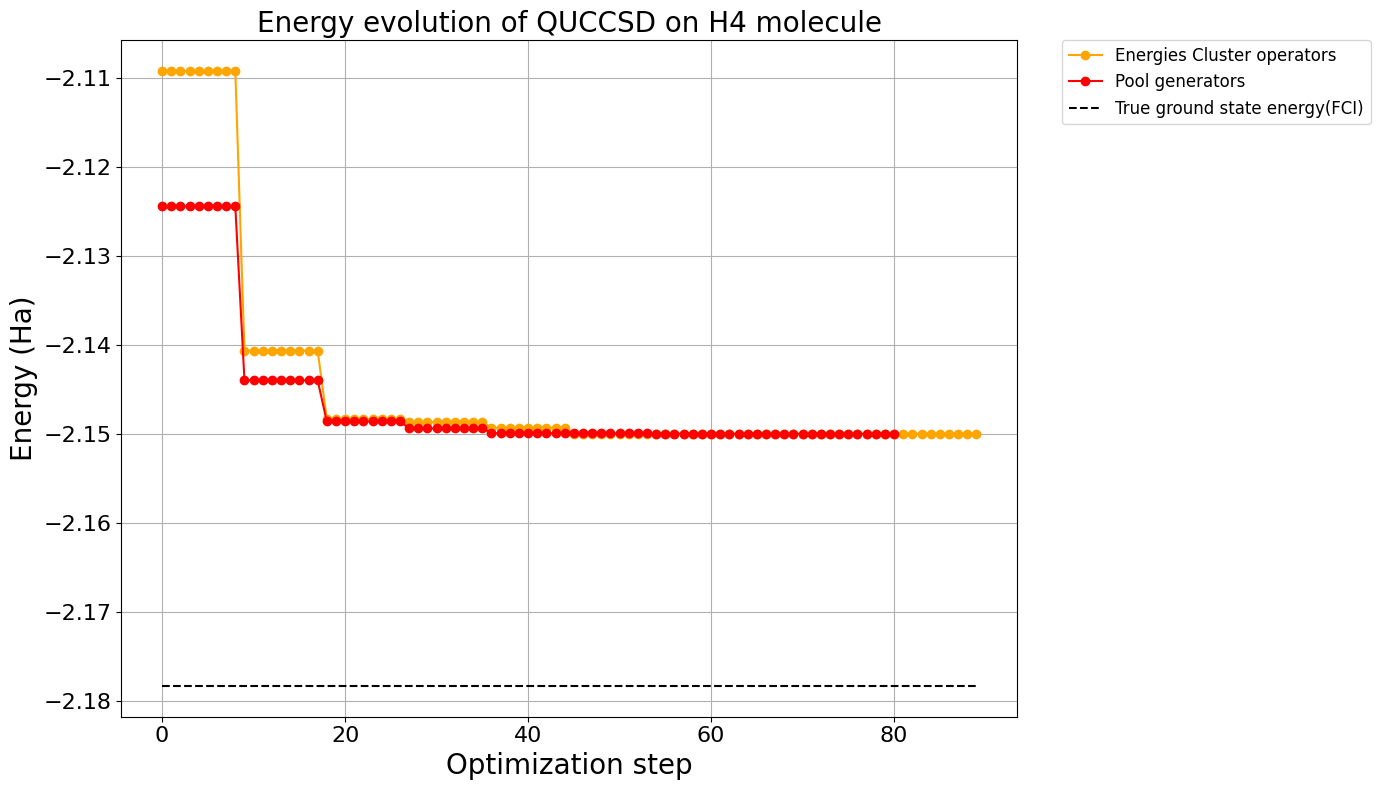

In [5]:
vqe.plot_energy_result()

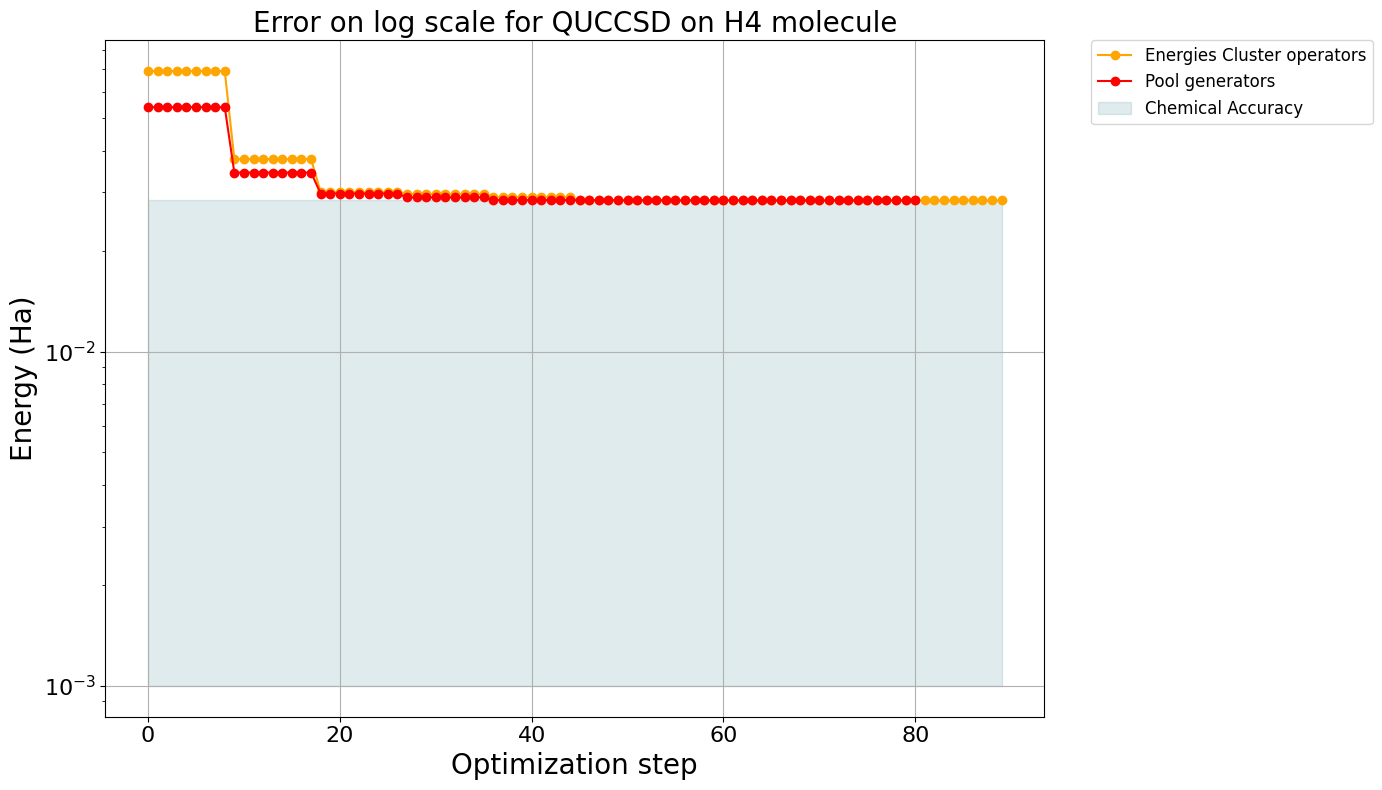

In [6]:
vqe.plot_error_result()